In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd



buisness= pd.read_json("yelp_business.json",lines=True)
review= pd.read_json("yelp_review.json",lines=True) 
users= pd.read_json("yelp_user.json",lines=True) 
chekin= pd.read_json("yelp_checkin.json",lines=True) 
tips= pd.read_json("yelp_tip.json",lines=True)  
photo= pd.read_json("yelp_photo.json",lines=True)

In [3]:

from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib import pyplot as plt


business= pd.read_json("yelp_business.json",lines=True)
review= pd.read_json("yelp_review.json",lines=True) 
users= pd.read_json("yelp_user.json",lines=True) 
chekin= pd.read_json("yelp_checkin.json",lines=True) 
tips= pd.read_json("yelp_tip.json",lines=True)  
photo= pd.read_json("yelp_photo.json",lines=True)
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500
df=pd.merge(business,review,how="left",on="business_id")
df=pd.merge(df,users,how="left",on="business_id")
df=pd.merge(df,chekin,how="left",on="business_id")
df=pd.merge(df,tips,how="left",on="business_id")
df=pd.merge(df,photo,how="left",on="business_id")
df.drop( ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time'],axis=1,inplace=True)

df.fillna({"weekday_checkins": 0,
           "weekend_checkins": 0,
           "average_tip_length": 0,
           "number_tips": 0,
           "average_caption_length": 0,
           "number_pics": 0}, inplace= True)



In [4]:
df.corr()
#shows strong correlation, that should be look closely further

#print(c.where((c >=0.3) | (c <=-0.5)))


,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
alcohol?,1.000000,0.305284,0.213318,0.345032,0.349004,0.259836,-0.043332,0.601670,0.190738,0.139108,0.037369,0.097188,0.117472,0.188598,0.165775,0.015261,0.129901,0.017794,0.026846,0.099141,0.094398,0.131175,0.098037,0.208856,0.305570,0.252523
good_for_kids,0.305284,1.000000,0.271788,0.258887,0.205513,0.162469,-0.030382,0.318729,0.150360,0.055847,-0.079183,0.073806,0.060658,0.113262,0.083832,0.016557,0.045057,0.024901,0.040692,0.094233,0.068960,0.079808,0.121948,0.156536,0.291413,0.175058
has_bike_parking,0.213318,0.271788,1.000000,0.235138,0.416044,0.155505,0.068084,0.160129,0.286298,-0.080443,-0.116295,0.130448,0.060595,0.114094,0.094000,0.028307,-0.045849,0.018120,0.031203,0.083062,0.082474,0.093579,0.144163,0.147115,0.180468,0.109552
has_wifi,0.345032,0.258887,0.235138,1.000000,0.240796,0.195737,-0.039857,0.312217,0.155098,-0.034258,-0.037712,0.054699,0.082213,0.147320,0.120622,0.015937,0.000448,0.023913,0.044006,0.082863,0.107467,0.126861,0.104742,0.173542,0.258938,0.210583
price_range,0.349004,0.205513,0.416044,0.240796,1.000000,0.148277,-0.052565,0.316105,0.400742,0.189623,0.003850,0.089349,0.073215,0.119422,0.098990,0.087231,0.176133,0.104221,0.122982,0.210487,0.057877,0.081321,0.129212,0.119632,0.170171,0.143570
review_count,0.259836,0.162469,0.155505,0.195737,0.148277,1.000000,0.032413,0.187755,0.119984,0.010070,0.004748,0.076265,0.548164,0.860767,0.746949,0.026206,0.050451,0.000474,-0.002576,0.014712,0.567452,0.699631,0.094133,0.844978,0.224983,0.610889
stars,-0.043332,-0.030382,0.068084,-0.039857,-0.052565,0.032413,1.000000,-0.024486,0.037748,-0.125645,-0.277081,0.782187,0.001320,0.043375,-0.000066,-0.007629,-0.038061,-0.031141,-0.066572,-0.064419,0.004130,0.007863,-0.052899,0.014038,0.000040,0.001727
take_reservations,0.601670,0.318729,0.160129,0.312217,0.316105,0.187755,-0.024486,1.000000,0.127941,0.064098,0.046331,0.086728,0.071131,0.129165,0.115583,-0.025522,0.048850,0.001131,0.010618,0.063990,0.053162,0.076183,0.084098,0.134832,0.282823,0.231242
takes_credit_cards,0.190738,0.150360,0.286298,0.155098,0.400742,0.119984,0.037748,0.127941,1.000000,0.056399,-0.081383,0.084171,0.049945,0.079879,0.077804,0.027924,0.078443,-0.007124,-0.005260,0.009551,0.047402,0.055898,0.119925,0.097700,0.103271,0.073276
average_review_age,0.139108,0.055847,-0.080443,-0.034258,0.189623,0.010070,-0.125645,0.064098,0.056399,1.000000,0.192355,0.003662,0.032199,0.031577,0.028122,0.218990,0.820888,0.243377,0.261623,0.377335,0.030324,0.035531,-0.000525,0.050846,-0.024121,-0.041140


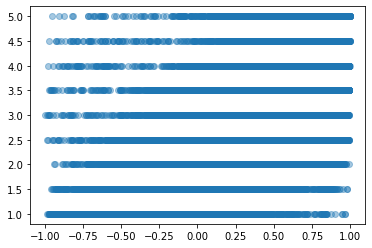

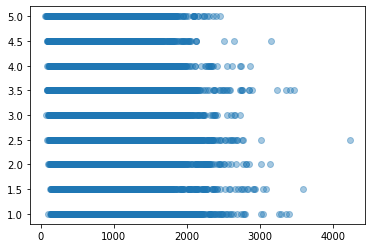

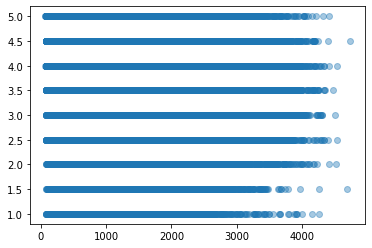

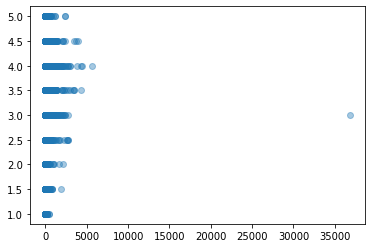

<Figure size 432x288 with 0 Axes>

In [5]:
plt.scatter(df["average_review_sentiment"],df["stars"], alpha= 0.4)
plt.show()
plt.clf()
plt.scatter(df["average_review_length"],df["stars"], alpha= 0.4)
plt.show()
plt.clf()
plt.scatter(df["average_review_age"],df["stars"], alpha= 0.4)
plt.show()
plt.clf()
plt.scatter(df["number_funny_votes"],df["stars"], alpha= 0.4)
plt.show()
plt.clf()

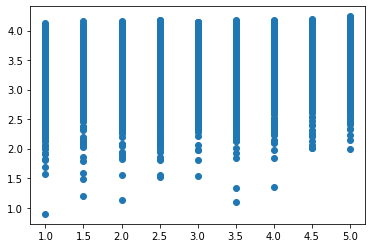

<Figure size 432x288 with 0 Axes>

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np
model = LinearRegression()
features = df[["average_review_length","average_review_age"]]
ratings = df["stars"]

X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model.fit(X_train,y_train)
model.score(X_train,y_train)
model.score(X_test,y_test)
sorted(list(zip(['average_review_length','average_review_age'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)
y_predict=model.predict(X_test)
plt.scatter(y_test,y_predict)
plt.show()
plt.clf()

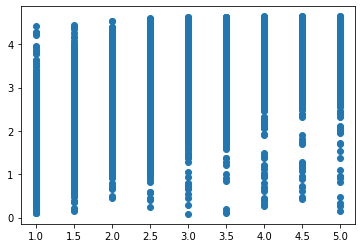

<Figure size 432x288 with 0 Axes>

In [7]:
sentiment=df["average_review_sentiment"]
sentiment=np.array(sentiment).reshape(-1,1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(sentiment, ratings, test_size = 0.2, random_state = 1)
model.fit(X_train1,y_train1)
model.score(X_train1,y_train1)
model.score(X_test1,y_test1)
sorted(list(zip(["average_review_sentiment"],model.coef_)),key = lambda x: abs(x[1]),reverse=True)
y_predict1=model.predict(X_test1)
plt.scatter(y_test1,y_predict1)
plt.show()
plt.clf()

Train Score: 0.6118980950438655
Test Score: 0.6114021046919492
[('average_review_sentiment', 2.303390843374967)]


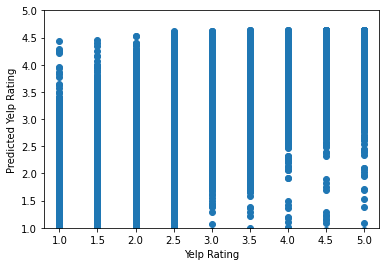

None


In [8]:
import numpy as np

# take a list of features to model as a parameter
def model_these_features(feature_list):
    # define ratings and features, with the features limited to our chosen subset of data
    ratings = df.loc[:,'stars']
    features = df.loc[:,feature_list]
    # perform train, test, split on the data
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    y_predicted = model.predict(X_test)
    plt.scatter(y_test,y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()
    
print(model_these_features(["average_review_sentiment"]))